In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv("BRCA.csv")

In [104]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [105]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [106]:
df = df.dropna()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [108]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


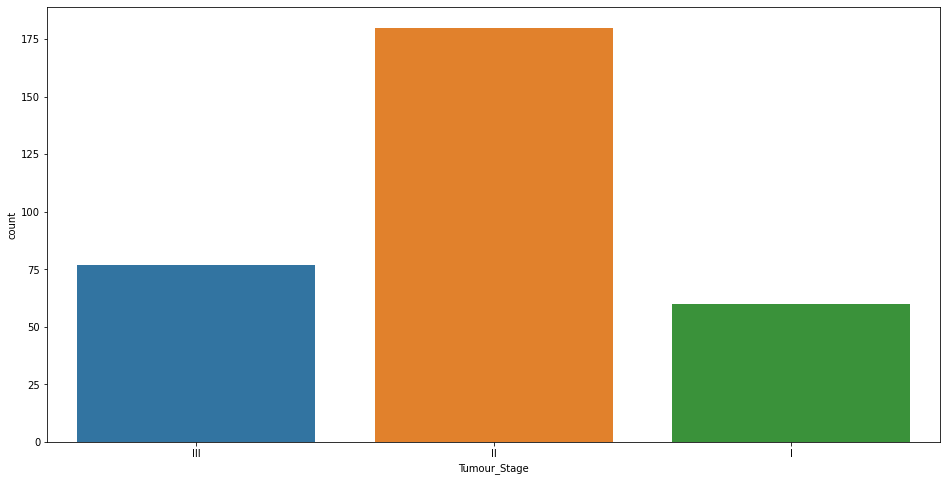

In [109]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Tumour_Stage")
plt.show()

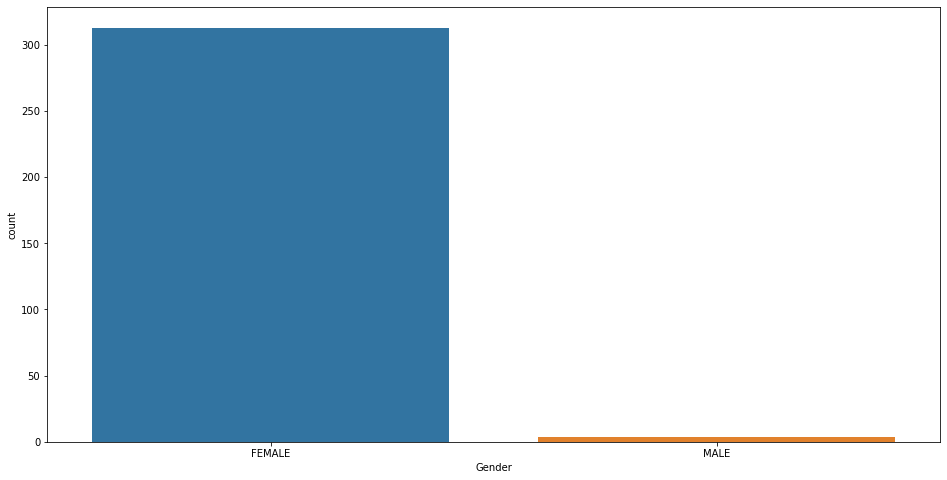

In [110]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Gender")
plt.show()

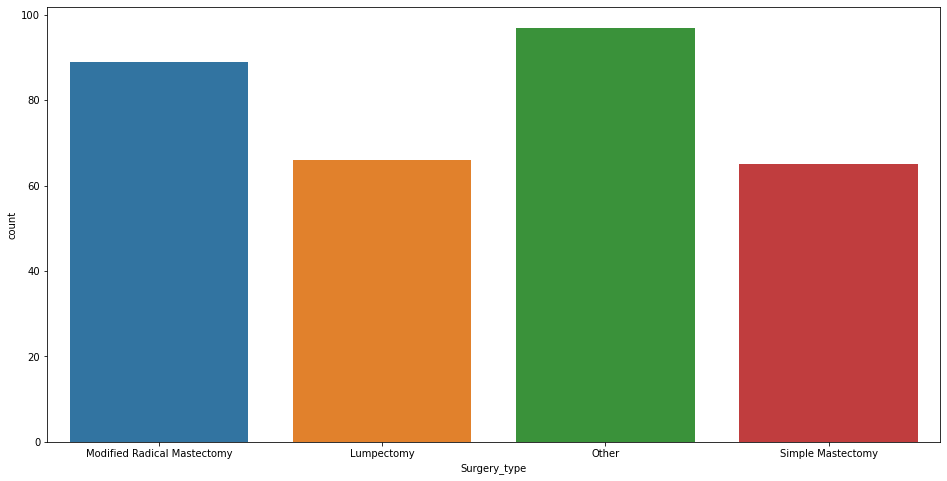

In [111]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Surgery_type")
plt.show()

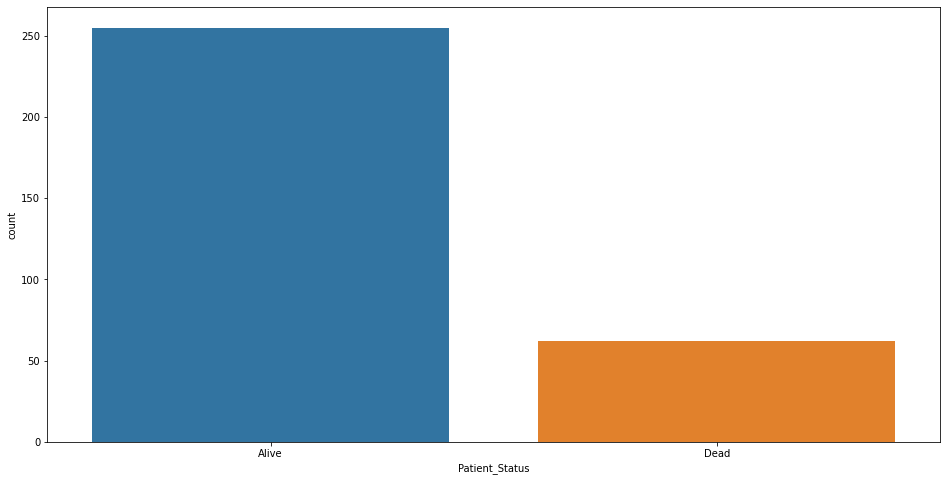

In [112]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Patient_Status")
plt.show()

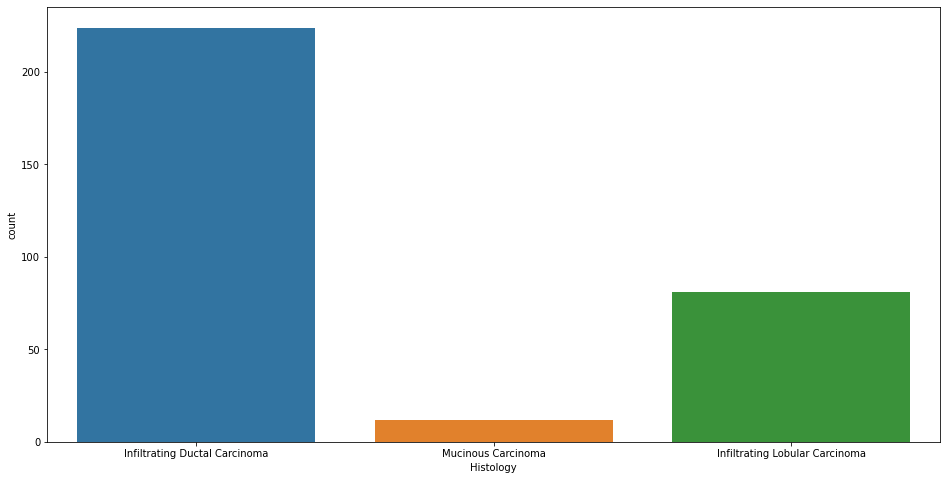

In [113]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Histology")
plt.show()

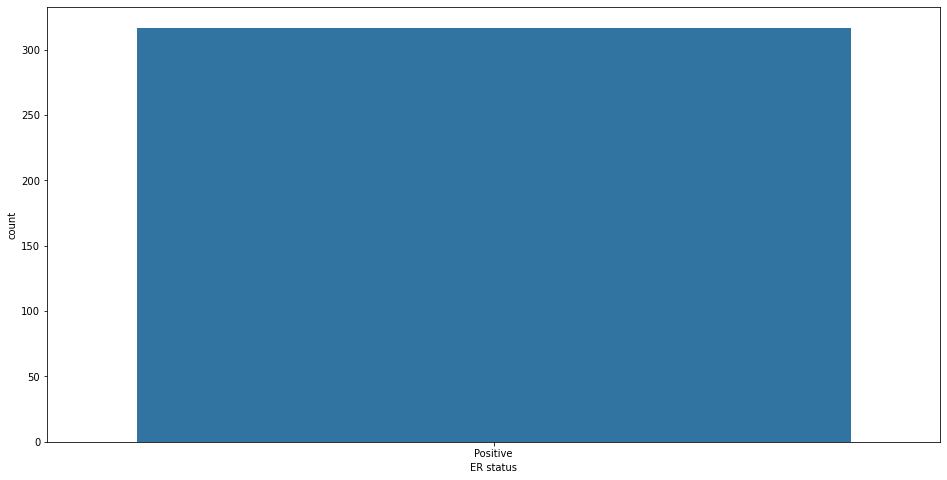

In [114]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "ER status")
plt.show()

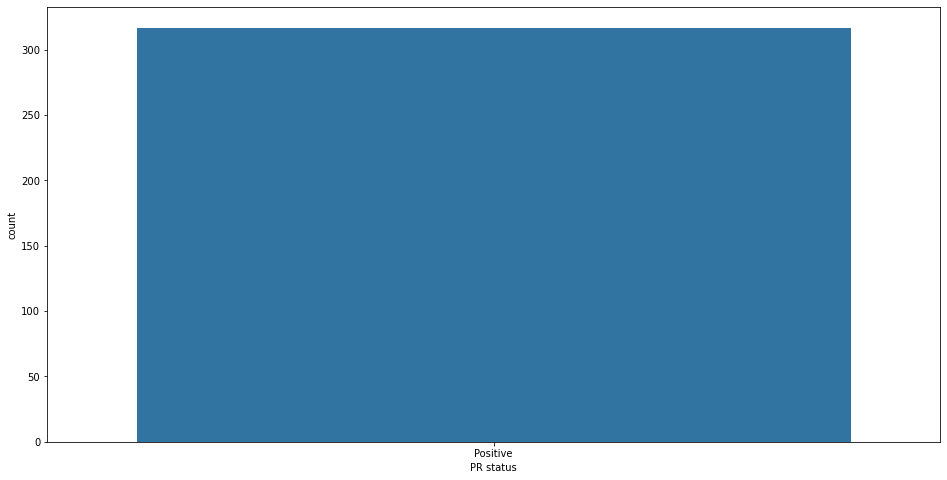

In [115]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "PR status")
plt.show()

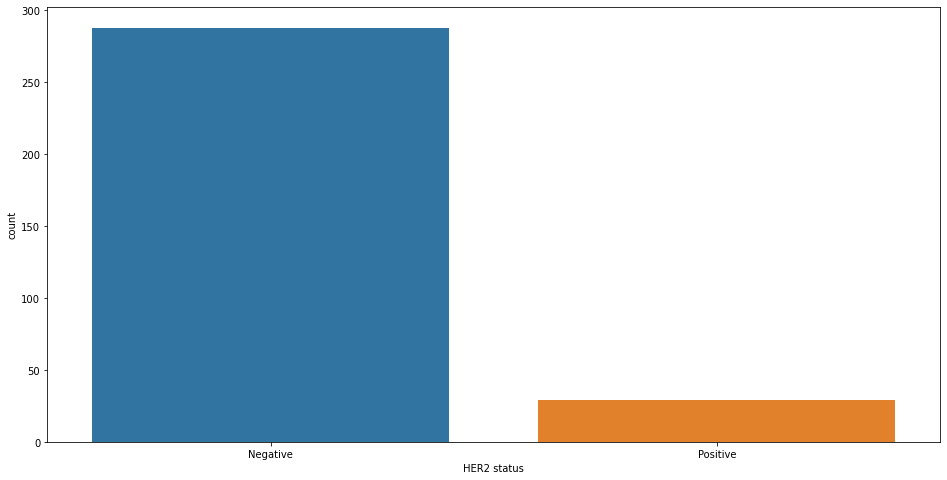

In [116]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "HER2 status")
plt.show()

In [117]:
encoder = LabelEncoder()

In [118]:
df["Tumour_Stage"] = encoder.fit_transform(df["Tumour_Stage"])
df["Histology"] = encoder.fit_transform(df["Histology"])
df["ER status"] = encoder.fit_transform(df["ER status"])
df["PR status"] = encoder.fit_transform(df["PR status"])
df["HER2 status"] = encoder.fit_transform(df["HER2 status"])
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Surgery_type"] = encoder.fit_transform(df["Surgery_type"])

In [119]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,0,0,1,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,0,0,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,0,0,2,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,0,0,1,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,0,0,2,06-May-17,27-Jun-19,Dead


In [120]:
X = df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']]
y = df['Patient_Status']

In [121]:
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [122]:
model = SVC()
model.fit(X_Train, y_train)

SVC()

In [123]:
y_pred = model.predict(X_Test)

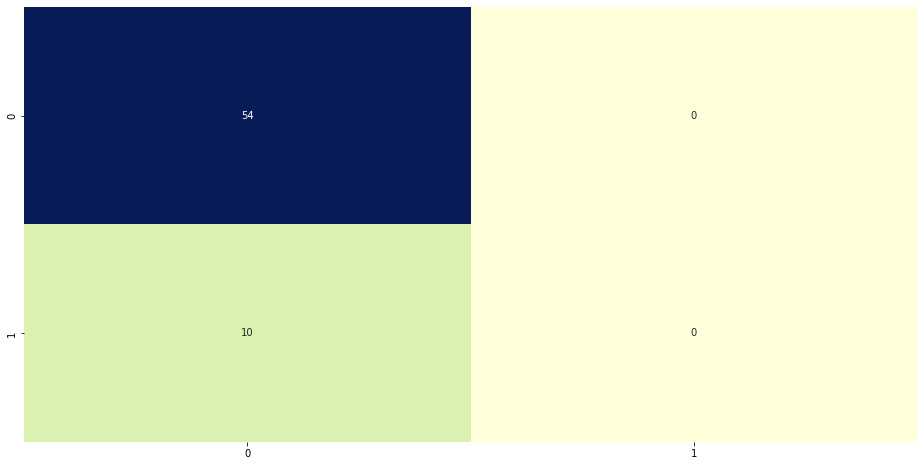

In [127]:
cm = confusion_matrix(y_pred = y_pred, y_true = y_test)

plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot = True,  cmap = "YlGnBu", cbar = False)
plt.show()

In [128]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Alive       1.00      0.84      0.92        64
        Dead       0.00      0.00      0.00         0

    accuracy                           0.84        64
   macro avg       0.50      0.42      0.46        64
weighted avg       1.00      0.84      0.92        64



In [ ]:
features = X_Test.iloc[15].values.reshape(1,-1)
print(f"Prediction: {model.predict(features).item()}")

Prediction: Alive
